In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
color = sns.color_palette()

In [2]:
wine = pd.read_csv('E:\Capston project\winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.shape

(1599, 12)

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

EDA(Exploratory Data Analysis)

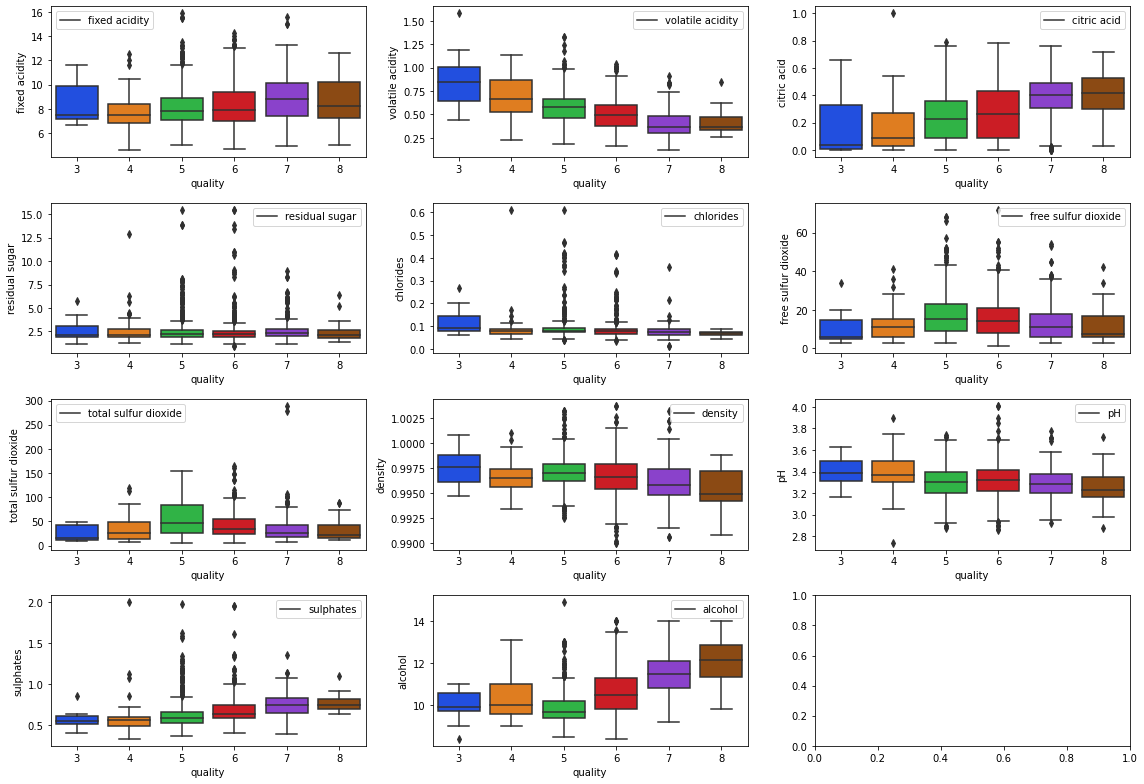

In [6]:
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
fig,ax = plt.subplots(4,3, figsize=(16, 11))
ax = ax.flatten()
i = 0
for col in cols:
    sns.boxplot("quality", col,ax=ax[i], data=wine,palette='bright')
    ax[i].legend([col], loc='best')
    i += 1
plt.tight_layout()
plt.show()

<AxesSubplot:>

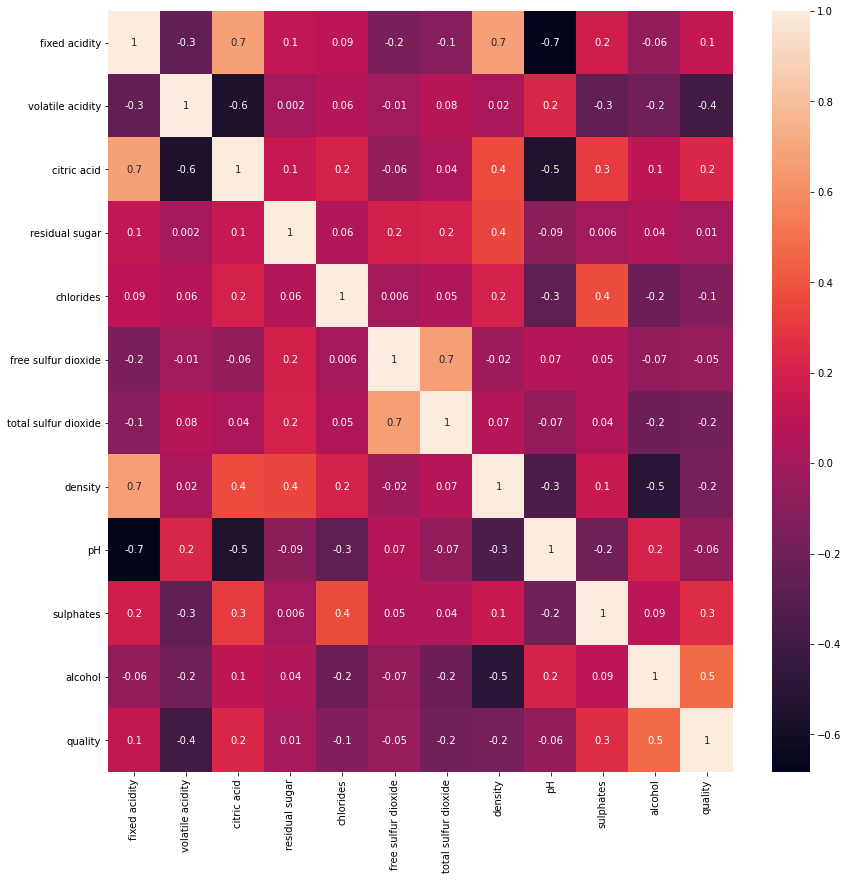

In [7]:
fig= plt.subplots(figsize=(14,14))
sns.heatmap(wine.corr(), annot = True, fmt='.1g')

# Preprocessing Data for performing Logistic Regression

In [8]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [9]:
#Now lets assign a labels to our quality variable
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_quality = LabelEncoder()

In [10]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [11]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

seperating the dataset as response variable and feature variabes for train test split

In [12]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

# Train and Test splitting of data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
pred_lr = logr.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       430
           1       0.53      0.34      0.41        50

    accuracy                           0.90       480
   macro avg       0.73      0.65      0.68       480
weighted avg       0.89      0.90      0.89       480



In [17]:
#Confusion matrix for the Logistic regression
print(confusion_matrix(y_test, pred_lr))

[[415  15]
 [ 33  17]]


RFE

In [18]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(logr,6)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=6)

In [19]:
X_train.columns[rfe.support_]

Index(['volatile acidity', 'citric acid', 'chlorides', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

In [20]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [21]:
cols=['volatile acidity', 'citric acid',
       'chlorides',
       'pH', 'sulphates', 'alcohol'] 
X1=wine[cols]
y1=wine['quality']

In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

In [23]:
logr = LogisticRegression(random_state=0)
logr.fit(X1_train,y1_train)
pred_lr1 = logr.predict(X1_test)

In [24]:
print(classification_report(y1_test, pred_lr1))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       430
           1       0.48      0.32      0.39        50

    accuracy                           0.89       480
   macro avg       0.70      0.64      0.66       480
weighted avg       0.88      0.89      0.88       480



In [25]:
#Confusion matrix 
print(confusion_matrix(y1_test, pred_lr1))

[[413  17]
 [ 34  16]]
